<a href="https://colab.research.google.com/github/juanmata8/title_classifiers_TFG/blob/main/clickbait_title_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Pandas & numpy:
import numpy as np
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Text data cleaning:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer


# Gensim:
import gensim
from gensim.utils import simple_preprocess

from gensim import corpora

# ML models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
from sklearn.metrics import roc_auc_score

In [ ]:
clickbait_titles = pd.read_csv('Clickbait_Titles200.csv')
nonClickbait_titles = pd.read_csv('NonClickbait_Titles200.csv', delimiter='|')

clickbait_titles

,title
0,¡Los 10 secretos que los expertos no quieren q...
1,Increíble truco para adelgazar en solo una semana
2,Lo que esta celebridad no quiere que veas de s...
3,¿Cómo ganar dinero desde casa fácilmente? Desc...
4,¡El mejor lugar para encontrar el amor en línea!
...,...
195,¡Descubre cómo hackear tu cerebro para ser más...
196,¡Este dispositivo te ayudará a dejar de roncar...
197,¡Los expertos están indignados con este método...
198,¡Descubre el secreto para atraer la abundancia...


In [ ]:
clickbait_titles["clickbait_class"]=0 #
nonClickbait_titles["clickbait_class"]=1 #

In [ ]:
df=pd.concat([clickbait_titles,nonClickbait_titles],axis=0).reset_index(drop=True)
df

,title,clickbait_class
0,¡Los 10 secretos que los expertos no quieren q...,0
1,Increíble truco para adelgazar en solo una semana,0
2,Lo que esta celebridad no quiere que veas de s...,0
3,¿Cómo ganar dinero desde casa fácilmente? Desc...,0
4,¡El mejor lugar para encontrar el amor en línea!,0
...,...,...
395,Los secretos de la resiliencia: técnicas para ...,1
396,Cómo vivir una vida más sencilla: consejos par...,1
397,La historia de la medicina moderna: avances qu...,1
398,Los secretos del envejecimiento saludable: háb...,1


In [ ]:
df.astype({'clickbait_class': 'category'}).dtypes

title                object
clickbait_class    category
dtype: object

In [ ]:
stop_words = pd.read_csv("/content/drive/MyDrive/datasets/fakeNewsEsp/stop_words_spanish.txt", sep=" ", header=None)
# stop_words = list(stop_words_txt)
stop_words

,0
0,a
1,actualmente
2,adelante
3,además
4,afirmó
...,...
603,éstos
604,última
605,últimas
606,último


In [ ]:
stop_words = stop_words.values.tolist()

In [ ]:
# stop_words.pop(342)
# print(stop_words[342])

In [ ]:
print(stop_words[342])

['no']


In [ ]:
def flatten_extend(matrix):
     flat_list = []
     for row in matrix:
         flat_list.extend(row)
     return flat_list

In [ ]:
stop_words = flatten_extend(stop_words)

In [ ]:
print(stop_words)

['a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', '

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_words:
            result.append(token)

    return result

Es posible que debido a que los títulos no tienen un gran número de palabras, tengamos que reducir las stopwords para mejorar la precision


In [ ]:
df['clean_title'] = df['title'].apply(preprocess)

In [ ]:
df['clean_joined'] = df['clean_title'].apply(lambda x: " ".join(x))

In [ ]:
X=df['clean_joined']
y=df['clickbait_class']

In [ ]:
print(X[0])

secretos expertos quieren sepas


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
print(x_test)

209              importancia conservación medio ambiente
280    curativo naturaleza terapia aire libre conexió...
33                        trucos vendedores éxito puedes
210             análisis detallado revolución industrial
93                                   secreto energía día
                             ...                        
246                  transformador perdón reconciliación
227       cultivar mentalidad positiva tiempos difíciles
369    superar procrastinación estrategias aumentar p...
176       expertos asombrados método mejorar vida sexual
289    construir mantener relaciones familiares salud...
Name: clean_joined, Length: 80, dtype: object


In [ ]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(x_train)
X_test_dtm = vect.transform(x_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(320, 607) (80, 607)


In [ ]:
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_dtm, y_train) # Instead of using X_train we use X_train_dtm
y_pred=model_1.predict(X_test_dtm) # # Instead of using X_test we use X_test_dtm
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: %.2f%%" % (f1 * 100.0))

Accuracy: 86.25%


NameError: name 'precision_score' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = XGBClassifier()
model_2.fit(X_train_dtm, y_train)
y_pred_model_2=model_2.predict(X_test_dtm)
score = metrics.accuracy_score(y_test, y_pred_model_2)
print("Accuracy: %.2f%%" % (score * 100.0))
precision = precision_score(y_test, y_pred_model_2)

# Calculate and print recall
recall = recall_score(y_test, y_pred_model_2)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred_model_2)
print("Recall: %.2f%%" % (recall * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("F1-score: %.2f%%" % (f1 * 100.0))

In [ ]:
model_3=LogisticRegression()
model_3.fit(X_train_dtm, y_train)
y_pred_model_3=model_3.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred_model_3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
precision = precision_score(y_test, y_pred_model_3)

# Calculate and print recall
recall = recall_score(y_test, y_pred_model_3)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred_model_3)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f%%" % (f1 * 100.0))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define your custom scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Perform cross-validation with multiple metrics
scores = cross_validate(clf, X_train_dtm, y_train, cv=5, scoring=scoring)

# Print the results for each metric
print("Cross-validation accuracy scores:", scores['test_accuracy'])
print("Mean accuracy: %.2f%%" % (scores['test_accuracy'].mean() * 100.0))

print("Cross-validation precision scores:", scores['test_precision'])
print("Mean precision: %.2f%%" % (scores['test_precision'].mean() * 100.0))

print("Cross-validation recall scores:", scores['test_recall'])
print("Mean recall: %.2f%%" % (scores['test_recall'].mean() * 100.0))

print("Cross-validation F1 scores:", scores['test_f1'])
print("Mean F1 score: %.2f%%" % (scores['test_f1'].mean() * 100.0))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train_dtm, y_train)
pred = clf.predict(X_test_dtm)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (score * 100.0))

# precision = precision_score(y_test, pred)

# # Calculate and print recall
# recall = recall_score(y_test, pred)

# # Calculate and print F1-score
# f1 = f1_score(y_test, pred)
# print("Recall: %.2f%%" % (recall * 100.0))
# print("Precision: %.2f%%" % (precision * 100.0))
# print("F1-score: %.2f%%" % (f1 * 100.0))

Accuracy: 92.50%


Confusion Matrix:
[[38  6]
 [ 0 36]]


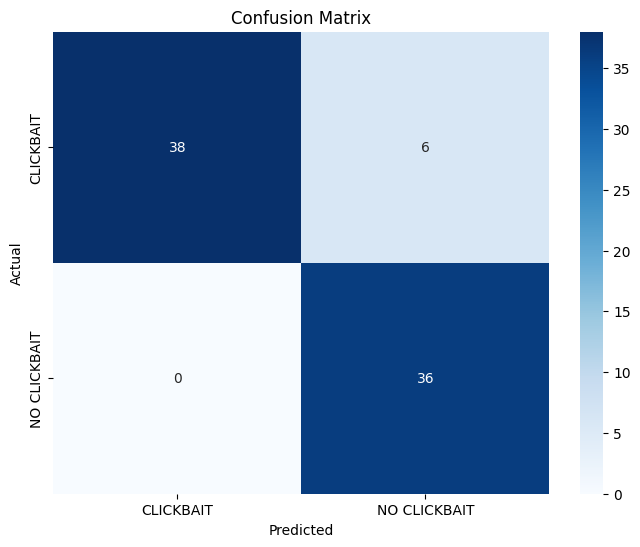

In [ ]:
confusion_mat = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_mat)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['CLICKBAIT', 'NO CLICKBAIT'], yticklabels=['CLICKBAIT', 'NO CLICKBAIT'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "title_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
   pickle.dump((vect, clf), file)